# CREPE: How to use

In [5]:
# fix relative import
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [6]:
# Import crepe
import torch
from crepe.model import Crepe

device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

crepe = Crepe(model_capacity='tiny', device=device)

print(f"crepe device: ", crepe.device)
print(f"crepe model_capacity: ", crepe.model_capacity)


crepe device:  mps
crepe model_capacity:  tiny


In [7]:
# Import test file
from crepe.utils import load_test_file

audio, sr = load_test_file("amy_10_04.wav", mono=True, normalize=True)

time, frequency, confidence, activation = crepe.predict(
    audio=audio,
    sr = sr
)
print("\nProcess..")
print(f"activation Shape: {activation.shape}")
print(f"confidence Shape: {frequency.shape}")
print(f"frequency Shape:  {frequency.shape}")
print(f"time Shape:       {frequency.shape}")



Process..
activation Shape: torch.Size([637, 360])
confidence Shape: torch.Size([637])
frequency Shape:  torch.Size([637])
time Shape:       torch.Size([637])


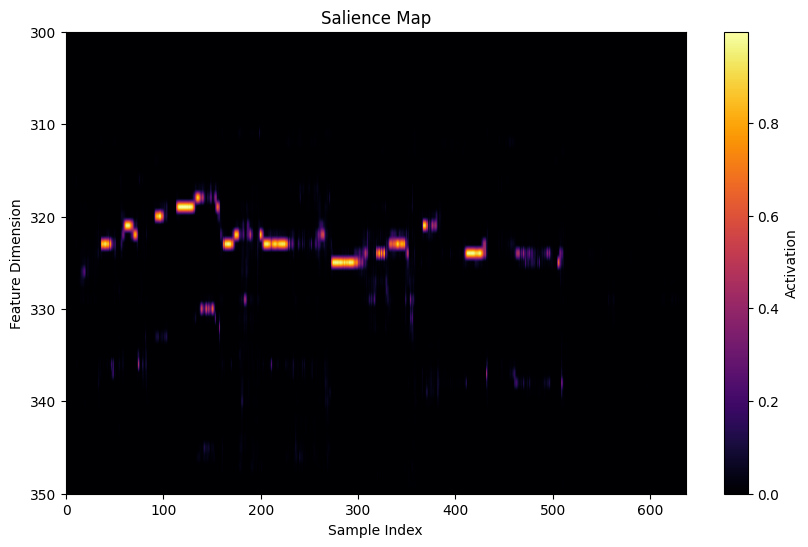

In [8]:
# plot results
import matplotlib.pyplot as plt
%matplotlib inline

salience = activation.flip(1)
salience_transposed = salience.transpose(0, 1)  # Transpose the axes
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.imshow(salience_transposed.detach().numpy(), cmap='inferno', aspect='auto')
plt.colorbar(label='Activation')  # Add a color bar for reference
plt.title('Salience Map')
plt.xlabel('Sample Index')  # Adjusted based on transposition
plt.ylabel('Feature Dimension')  # Adjusted based on transposition
plt.ylim(350, 300)  # Set the y-axis range from 350 to 250
plt.show()